<a href="https://colab.research.google.com/github/Jaiharish-passion07/Almabetter-Capstone_project/blob/master/Jai_Harish_capstone_project_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mounting drive to load data 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# #Manually need to install this dependencies
# !pip install geopandas
# !pip install --upgrade plotly

##Importing all Necessary Libraries

In [3]:
#Importing all Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point,Polygon
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from shapely import wkt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

##Air_bnb Data Frame

In [4]:
#Loading Data
df_air=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Project/EDA/Datas/Airbnb NYC 2019.csv')
df_air=pd.DataFrame(df_air)

In [5]:
# Head of Dataframe
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#Tail fo DataFrame
df_air.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
# Remove Unwanted Columns
df_air.drop('id',axis=1,inplace=True)

In [8]:
# Shape of DataFrame
df_air.shape

(48895, 15)

##Datatypes of Each Column

__Casting the Columns__

In [9]:
# Casting the Columns into their respective Data types
df_air['host_id']=df_air['host_id'].astype('object')
df_air['last_review']=pd.to_datetime(df_air['last_review'])

In [10]:
#Rename columns 
df_air.dtypes.reset_index().rename(columns={'index':'Column',0:'Datatype'})

,Column,Datatype
0,name,object
1,host_id,object
2,host_name,object
3,neighbourhood_group,object
4,neighbourhood,object
5,latitude,float64
6,longitude,float64
7,room_type,object
8,price,int64
9,minimum_nights,int64


##Statistical Information

In [11]:
#Getting statistical Information
columns=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
#We don't include Latitude and Longitude because they are geographical data
df_air[columns].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


_From Statistical Information we can see that price column has zero value.It is not a correct data._

In [12]:
#From statistical Anlaysis,price can't be zero so we remove those rows
df_air=df_air.loc[df_air['price']!=0]

##Cleaning Data by Removal of Null values

1. Removing __host_name__ row datas from Dataframe
2. Replacing __name__ column null values by __'Missing'__ Labels
3. __Mode Imputation__ Techniques used for __Last review__ column
4. __Median Imputation__ Techniques used for __reviews_per_month__ column

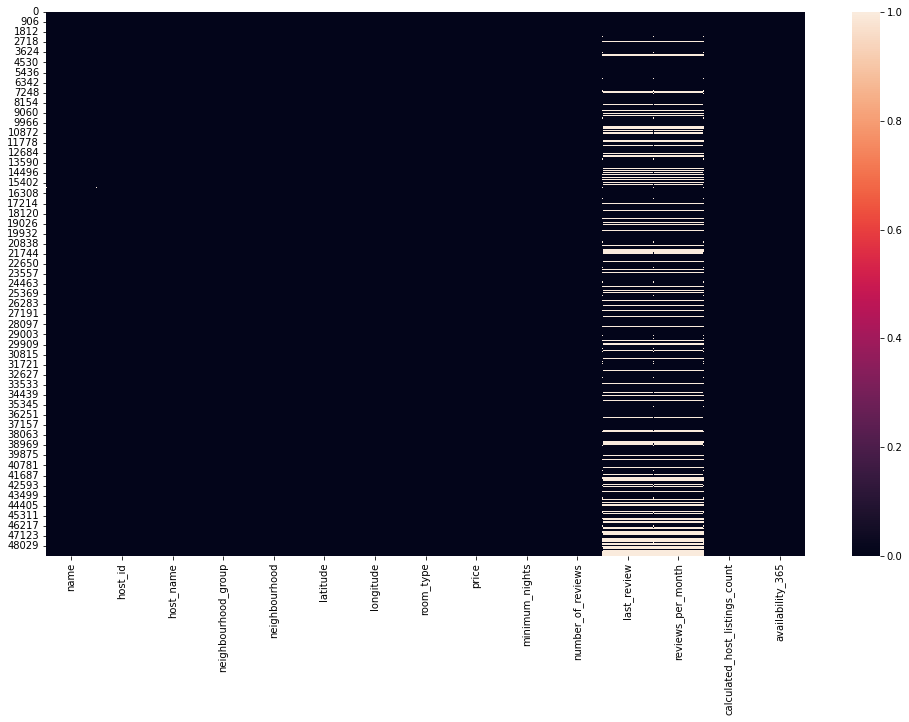

In [13]:
#Visualization of Null values using Heatmap
plt.figure(figsize=(17,10))
sns.heatmap(df_air.isnull())

In [14]:
#Removing Null values
df_air1=df_air.copy()
#Removing host_name rows
df_air_clean=df_air1.loc[~df_air1['host_name'].isnull()]
#Replacing name column null values by 'Missing' Labels
df_air_clean['name'].replace({np.nan:'Missing'},inplace=True)
#Mode Imputation Techniques used for Last review column
df_air_clean['reviews_per_month'].fillna(df_air_clean['reviews_per_month'].median(),inplace=True)
#Median Imputation Techniques used for reviews_per_month column
df_air_clean['last_review'].fillna(df_air_clean['last_review'].mode().values[0],inplace=True)

In [15]:
#Count of Null values after Imputation
df_air_clean.isnull().sum().reset_index().rename(columns={'index':'Column',0:'Count'})

,Column,Count
0,name,0
1,host_id,0
2,host_name,0
3,neighbourhood_group,0
4,neighbourhood,0
5,latitude,0
6,longitude,0
7,room_type,0
8,price,0
9,minimum_nights,0


##Univariate Analysis

In [16]:
#Getting numeric columns
numerics = ['int32', 'int64', 'float64']
numer_col=list(df_air_clean.select_dtypes(include=numerics).columns)
#We don't include Latitude and Longitude because they are geographical data
numer_col=[i for i in numer_col if i not in ['latitude','longitude']]

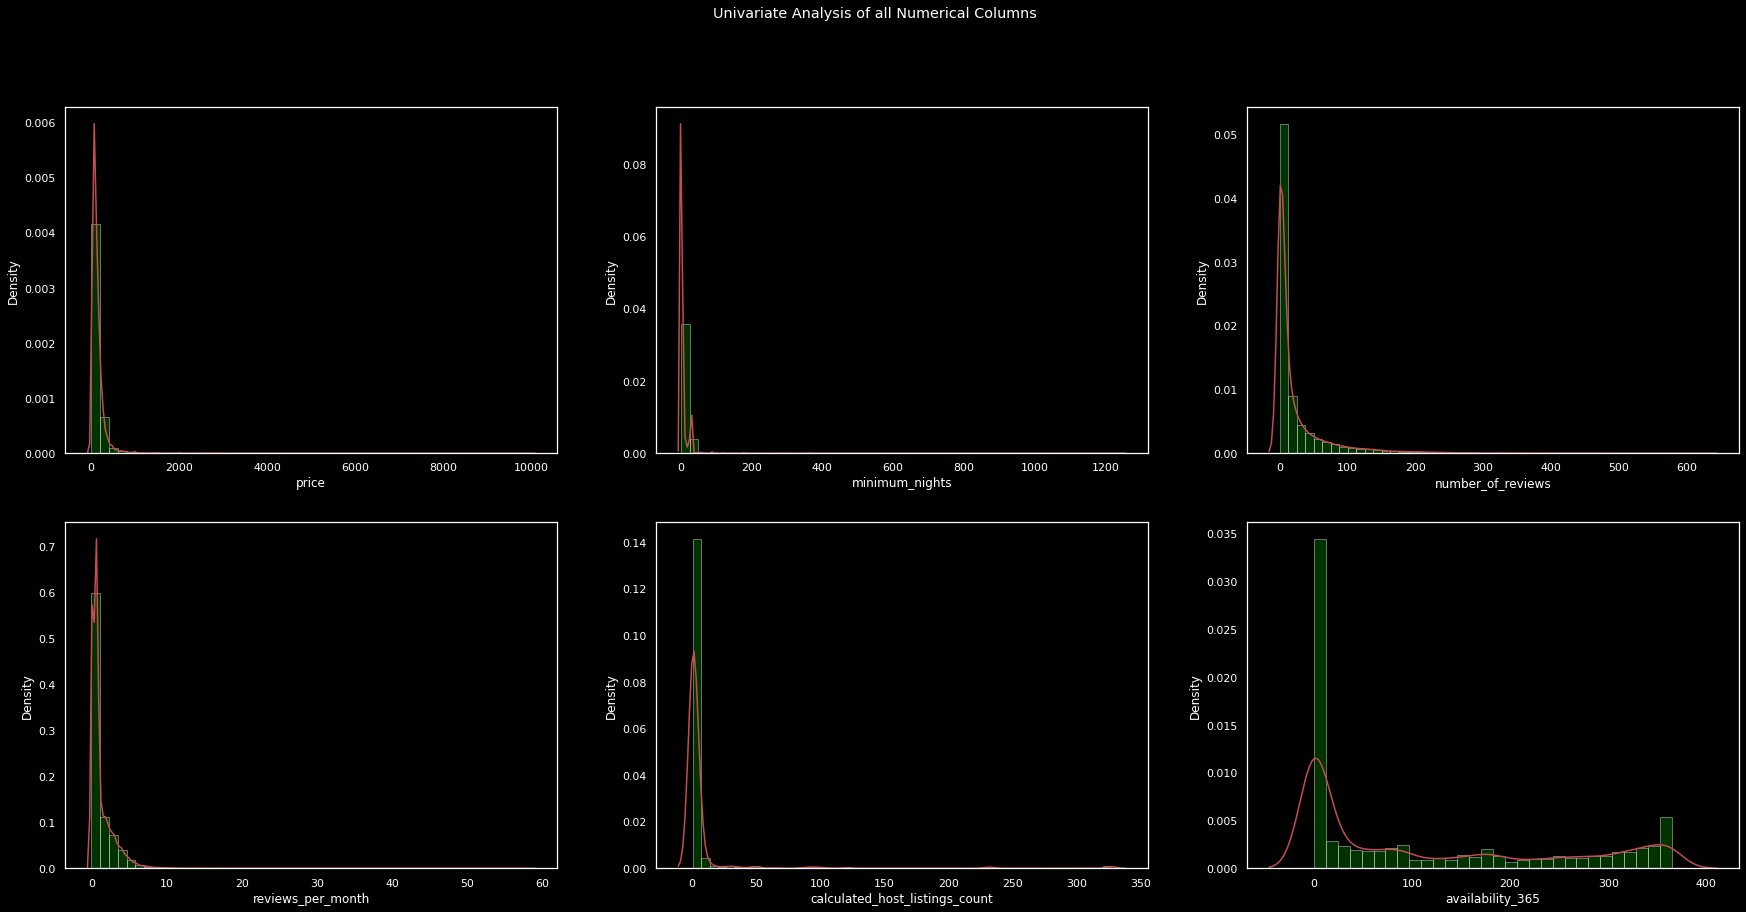

In [17]:
#setting the background style
sns.set_theme('notebook', style='dark')
plt.style.use("dark_background")
#creating subplots 
fig, ax =plt.subplots(2,3,figsize=(30,14))
#setting a title of enitre graph
fig.suptitle('Univariate Analysis of all Numerical Columns')
ind,ind1=0,0
axis=0
for i in numer_col:
  if ind<3:
    #plotting graphs for first axis(row)
    sns.distplot(df_air_clean[i],kde=True,color='green',kde_kws={'color':'r'},ax=ax[axis][ind])
    ind=ind+1
  elif ind>=3:
    axis=1
    #plotting graphs for second axis(row)
    sns.distplot(df_air_clean[i],kde=True,color='green',kde_kws={'color':'r'},ax=ax[axis][ind1])
    ind1=ind1+1
#show figure
fig.show()


<u>From above plots all have these Characteristics</u>
* __Deviate__ from the __normal distribution__.
* It has a __positive skewness__.
* High __peakedness__.

## Bivariate Analysis or Relationship of Numerical Features

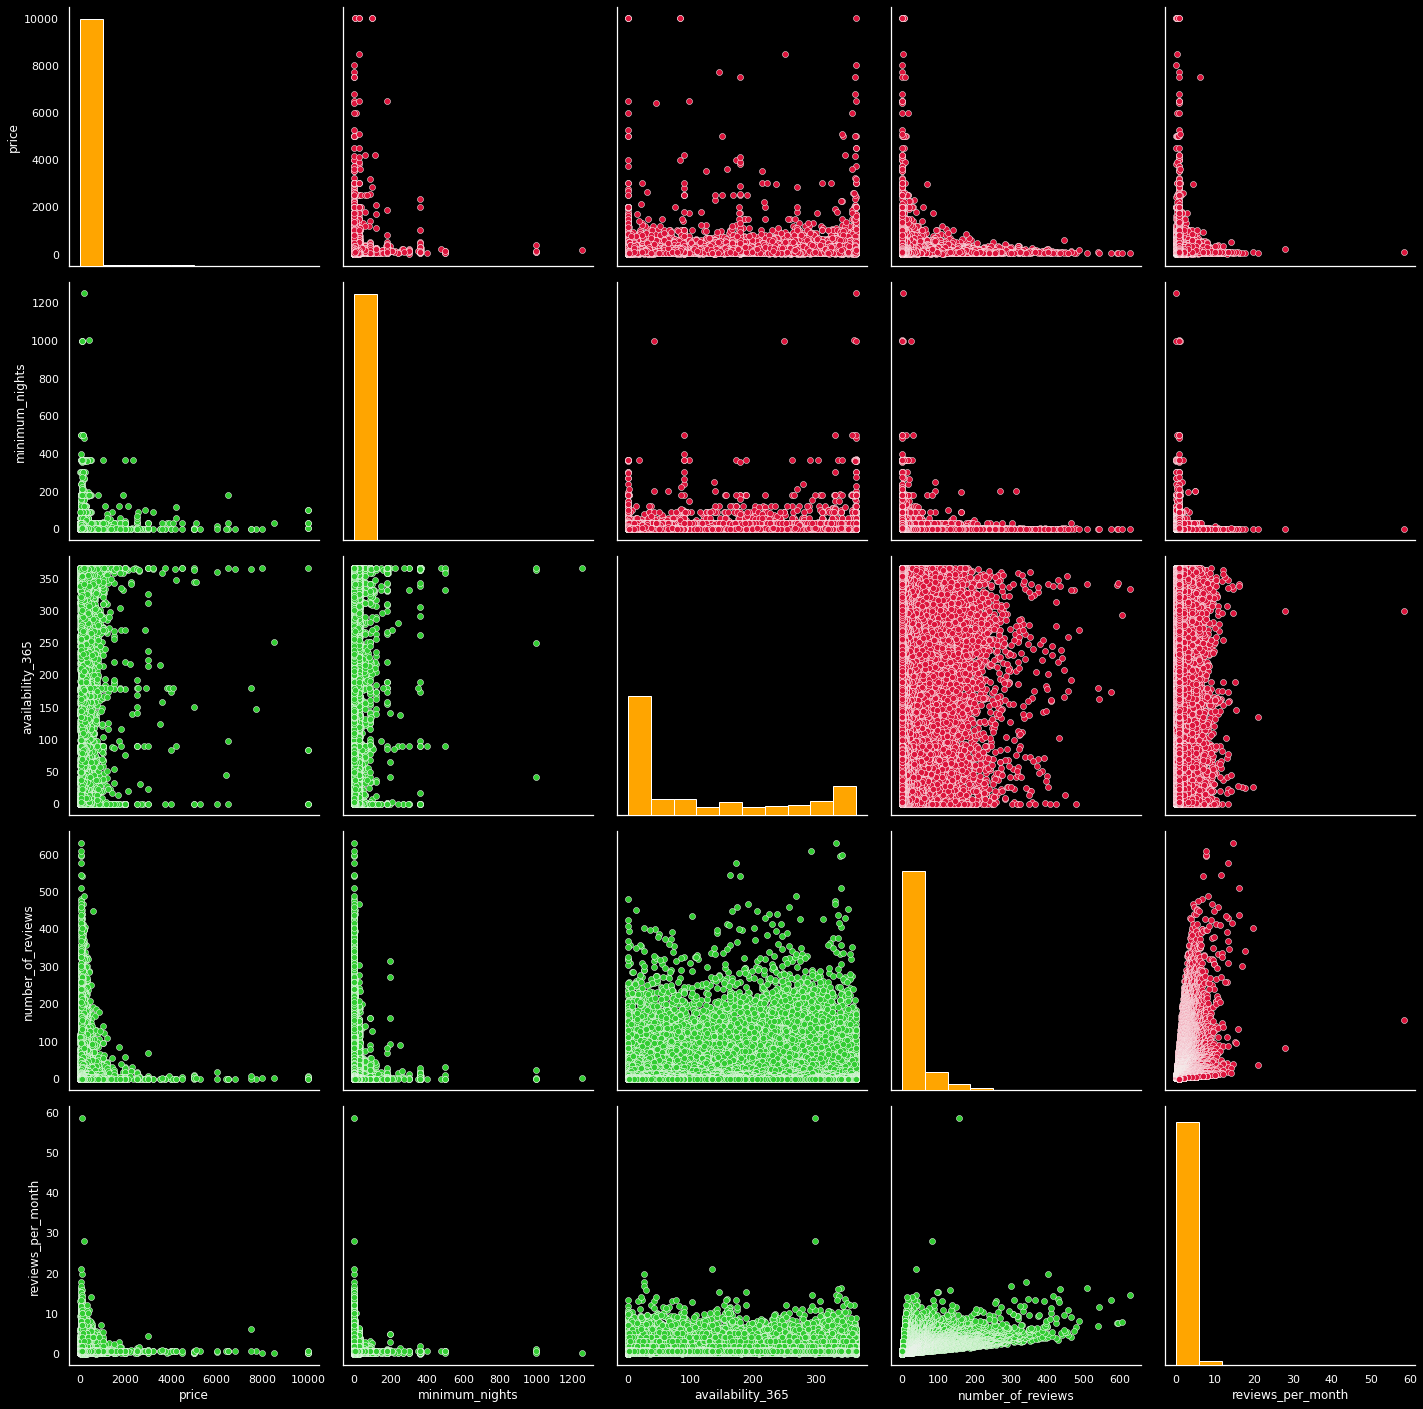

In [18]:
#Plotting a pair plot for bivariate analysis
g = sns.PairGrid(df_air_clean,vars=['price','minimum_nights','availability_365','number_of_reviews','reviews_per_month'],size=4)
#setting color
g.map_upper(sns.scatterplot, color='crimson')
g.map_lower(sns.scatterplot, color='limegreen')
g.map_diag(plt.hist, color='orange')
#show figure
plt.show()

<u>From above plot </u>
1. Number of reviews and review per month follows __linear relationship__ between them.
2. Some plot has a extreme points

##Relationship of Categorical Features

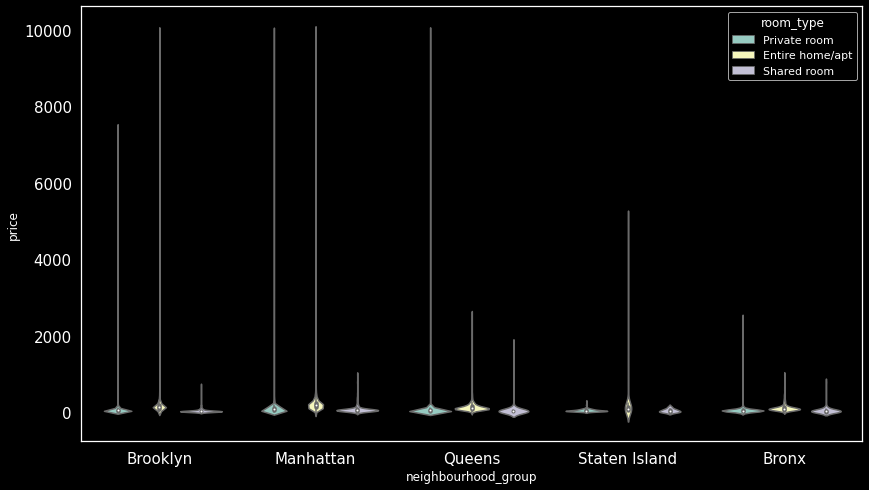

In [19]:
#setting the figure size size and fontsize
plt.figure(figsize=(14,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = plt.axes()
ax.set_facecolor("black")
#Plotting violin graph to show the relationship between catgorical feature vs price numeric column
sns.violinplot(x=df_air_clean['neighbourhood_group'],y=df_air_clean['price'],hue=df_air_clean['room_type'])

<u>From above plot </u>
1. In __Manhattan Shared room and Entire home/apt__ type contributes __same amount of price__. 
2. Most of the rooms are in price __below 2000__ in all __neighborhoods group__.
3. __Shared room type__ in Each Neighborhood contributes low price. In __Queens and Manhattan__ state __private room__ price contributes __equal amount__.
4. __Manhattan, Brooklyn,Queens__ has __highest__ price of rooms per night.It may be also a __extreme data points__.

## Correlation plot

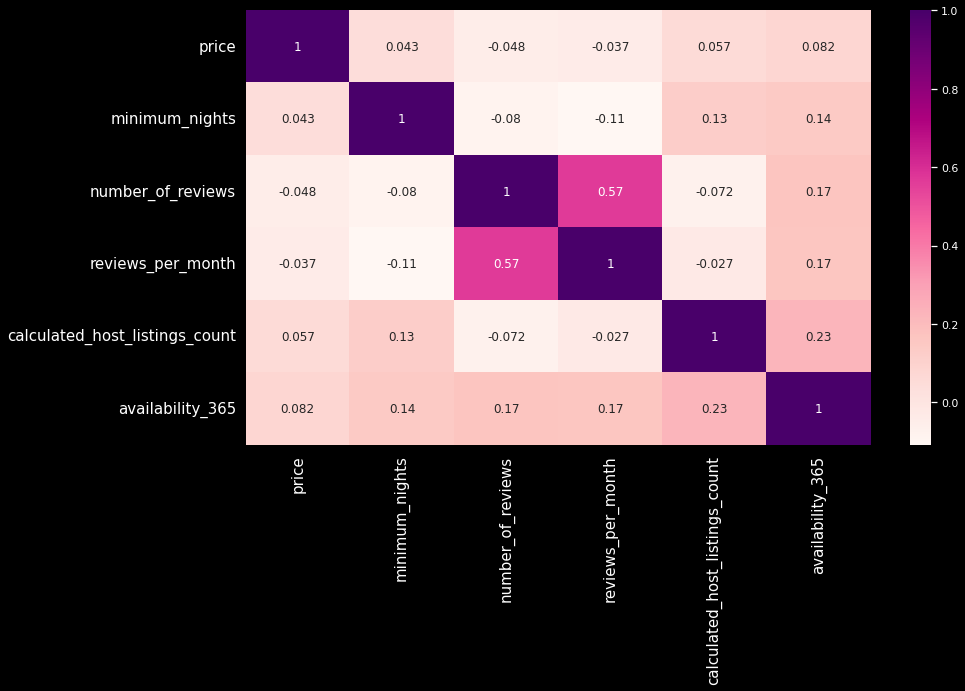

In [20]:
#setting the figure size and fontsize
plt.figure(figsize=(14,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#visualzing the corelation between all numeric features
sns.heatmap(df_air_clean[columns].corr(),annot=True,cmap='RdPu')

<u>_<b>Top 3 correlation columns</b>_</u>
1. _The __number_of_reviews__ and __reviews per_month__ columns has highest correlation of values is_ __.55__ 
2. _The __calculated_host_listings_count__ and __availability_365__ columns second highest correlation of values is_ __.23__
3. _The __reviews_per_month__ and __availability_365__ columns second highest correlation of values is_ __.19__<br>


## Exploratory Data Analysis

1. What can we learn from predictions? (ex: locations, prices, reviews, etc)
2. Which hosts are the busiest and why?


### <font color=blue>__1. What can we learn from predictions?__ (ex: locations, prices, reviews, etc)</font>



In [21]:
#Copying Dataframe
df_eda_data=df_air_clean.copy()

__i) What can we learn from Locations and Prices?__

In [22]:
#Grouping the neighbourhood_group and neighbourhood colunms and perform mean aggregate function over price and number_of_reviews
df_loca_1=df_eda_data.groupby(['neighbourhood_group','neighbourhood'])[['price','number_of_reviews']].mean().reset_index().rename(columns={'price':'Mean_price'})
#Rounding the mean_price and number_of_reviews column
df_loca_1['Mean_price']=df_loca_1['Mean_price'].apply(lambda x:np.round(x,1))
df_loca_1['number_of_reviews']=df_loca_1['number_of_reviews'].apply(lambda x:np.round(x,1))
#Grouping the neighbourhood_group and neighbourhood colunms and perform count aggregate function over name
df_loca_2=df_eda_data.groupby(['neighbourhood_group','neighbourhood'])['name'].count().reset_index().rename(columns={'name':'count'})

In [23]:
#Merging df_loca_1 and df_loca_2
locations_data=pd.merge(df_loca_1,df_loca_2, on=['neighbourhood_group','neighbourhood'])

__Treemap__

In [24]:
#plotting treemap of all neighborhood country vs average price
fig = px.treemap(locations_data, 
                 path=[px.Constant("NYC Airbnb"),'neighbourhood_group','neighbourhood'],
                 values='count',color='Mean_price', hover_data=['neighbourhood'],color_continuous_scale='YlGn')
#Updating traces and layout to beautify the plot 
fig.update_traces(root_color="lightgrey",textfont=dict(size=13))
fig.update_layout(title='Total Bookings of Borough Country vs Average Price',margin = dict(t=50, l=25, r=25, b=25))
#show figure
fig.show()

<u>From above plot</u>


1. ___Manhattan State___ is the ___most expensive___ one. The total count of room bookings is __21651__ and the __average price__ is __196__. The top three best places in Manhattan that customer visitng are ___Harlem,Upper west side,Hell's kitchen___. The price of that place is also less compare to other Neighborhood place. Due to this the more number of customer visits that place
2. ___Brooklyn___ stands ___second Highest___ number of bookings count. Top three places that visiors visits are ___Williamsburg Bedford-Stuyvesant,Buschwick___ and __average price__ of room is __124.44__.
3. ___Bronx___ is the ___cheapest___ one.So We can predict that ___Manhattan state___ will be the ___most busiest state___.we have to focus more in Manhattan state. And make sure that we should create ___more rooms___ in that area in order to ___gain more profit___.

###<font color=blue>__2.Which hosts are the busiest and why?__</font>

In [25]:
#Counting numer of time each host_id occur
host_id11=df_eda_data[['host_id','host_name']].value_counts().reset_index().head(10)
host_id11.rename(columns={'host_id':'Host_id','host_name':'Host_name',0:'Count'},inplace=True)
#Replacing hostid with hypen symbol at end of each id. Because Plotly assumes it has integer
host_id11['Host_id']=host_id11['Host_id'].astype('string').apply(lambda x:x+"_")
#plotting bar graph and styling with pattern shape
fig = px.bar(host_id11, y='Count', x='Host_id', text='Count',color='Host_name',opacity=.8,pattern_shape="Host_id", 
             pattern_shape_sequence=['x', '/', '\\', 'x', '-', '|', '+', '.'],color_discrete_sequence=px.colors.qualitative.Prism)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='Busiest Hosts',xaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),plot_bgcolor='black')
#show figure
fig.show()

<u>From above plot </u>
1. we can see that ___Sonder(NYC)___ is ___most busiest___ host with total count of bookings is __327__

__i) why the above host has a highest bookings count?__

In [26]:
#Replacing hostid with " "at end of each id.
host_id_list=list(host_id11['Host_id'].apply(lambda x:int(x.replace('_',""))))

In [27]:
#Fitlering out top hosts data
df_anal=df_eda_data.loc[df_eda_data['host_id'].isin(host_id_list)]

In [28]:
#Grouping the host_id,host_name and neighbourhood_group columns and perform sum aggregate funtion over number_of_reviews
df_son_1=df_anal.groupby(['host_id','host_name','neighbourhood_group'])['number_of_reviews'].sum().reset_index()
#Grouping the host_id,host_name and neighbourhood_group columns and perform mean aggregate funtion over price
df_son_2=df_anal.groupby(['host_id','host_name','neighbourhood_group'])['price'].mean().reset_index()

In [29]:
#Fetching all neighborhoods area for each host and counting them
df_son_3=df_anal.groupby(['host_id','host_name','neighbourhood_group'])['neighbourhood'].apply(set).reset_index()
df_son_3['neighbourhood_count']=df_son_3['neighbourhood'].apply(lambda x:len(x))

In [30]:
#Merging df_son_1 and df_son_2 
df=pd.merge(df_son_1,df_son_2,on=['host_id','host_name','neighbourhood_group'])
#Merging df and df_son_3
df1=pd.merge(df,df_son_3,on=['host_id','host_name','neighbourhood_group'])

In [31]:
#plotting treemap of all Busiest Hosts Rental place in Each Neighborhood Country vs Number of reviews
fig = px.treemap(df1, 
                 path=[px.Constant("Top Host rooms in Each Neighborhood Country"),'host_name','neighbourhood_group'],
                 values='price',color='number_of_reviews', hover_data=['neighbourhood_count'],color_continuous_scale='blugrn')
#Updating traces and layout to beautify the plot 
fig.update_traces(root_color="lightgrey",textfont=dict(size=13))
fig.update_layout(title='Busiest Hosts Rental place with bookings count and number of reviews',margin = dict(t=50, l=25, r=25, b=25))
#show figure
fig.show()

1. The bubble chart describes that in ___Staten island___ state the ___Silver lake area___ has most ___number of reviews___ with __118.5__. 
2. It says that the customers which stayed in that neighborhood place rooms. The customer may have some complaints regarding room service or some of them may be happy with service. ___To improve visitors and customer satisfication___ in Staten Island we have to work on the ___customers negative feedback___.

## __Custom Analysis__

#### Hi My name is __Vidhyut__ and I'm a __traveller__. I'm moving to __Queens,Brooklyn, Manhattan__ Neigborhoods Group to explore it. I don't know some information and living cost about those places. As you are a DataScientist explore the given Dataset and answer some specific Question which mentioned below.

###<font color=blue>__1).I'm choosen Queens Neigborhood to live there for 20 days.Whether it will be cheaper to stay there compare to other neighborhoods.__</font>

In [32]:
#Filtering out the Brooklyn,manhattan,Queens borough country data from Dataframe
df_new=df_eda_data.loc[df_eda_data['neighbourhood_group'].isin(['Brooklyn', 'Manhattan', 'Queens'])]
#plotting bar graph and styling with pattern shape
fig = px.bar(x='neighbourhood_group',y='price',data_frame=df_new.groupby(['neighbourhood_group']).mean().reset_index(),text='neighbourhood_group',color='neighbourhood_group',opacity=.8,pattern_shape="neighbourhood_group", pattern_shape_sequence=[".", "x", "+"],color_discrete_sequence=px.colors.qualitative.Prism)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='White'))
fig.update_layout(title='Neighborhood price of Manhattan,Brooklyn and Queens',xaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),plot_bgcolor='black')
#show figure
fig.show()

<u>From above plot</u>
1. The __Queen__ neighborhood price of room is __99.53__ is __cheaper__ to stay compare to other neigborhood __Manhattan and Brooklyn__ based on the __room prices__.

###<font color=blue>__2.If Queens Neigborhood is cheaper,Then which room type can I prefer and area(neighborhood) best to visit  at Affordable cost. If not what is the alternative option to stay at other neighborhood group with room type and places at best cost.__</font>

In [33]:
#Filtering out only Queens borough country data from Dataframe
queen_data=df_new.loc[df_new['neighbourhood_group']=='Queens']
#plotting bar graph for Queens Borough country vs Room type
fig = px.bar(x='neighbourhood',y='price',data_frame=queen_data.groupby(['neighbourhood','room_type']).mean().reset_index(),color='room_type',barmode='group',opacity=.7,color_discrete_sequence=px.colors.qualitative.Set1)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_layout(title='Queens Room type and its places to visit at affordable Cost',yaxis_title='Average_Price_Per_Night',xaxis=dict(titlefont = dict(size=14),tickfont = dict(size=12)),yaxis=dict(titlefont = dict(size=14),tickfont = dict(size=12),
        showgrid=False,
        showticklabels=True),plot_bgcolor='black',autosize=False,
    width=1600,
    height=800)
#show figure
fig.show()

<u>From above plot</u>
1. The Nighborhood of __South Ozone park__ with Shared room type is best place to visit at __affordable cost__.Because we can see from graph the __average price__ for that room type is __31$__.

###<font color=blue>__3.Once I stayed for  20 days.I had a balance amount of Rs.15000.Then I decided to stay other 10 days at Staten Island.Is this amount is sufficient only for room expenses?__</font>


In [34]:
#Filtering out only Staten Island borough country data from Dataframe
df_staten=df_eda_data.loc[df_eda_data['neighbourhood_group'].isin(['Staten Island'])]
#Calculating avg price for 10 days
price_=round(df_staten['price'].mean()*10,0)

In [35]:
if price_<=15000:
    print(f'The average amount to stay Rooms in Staten Island for 10 days is {price_}. Your amount is more Sufficient to stay there.')
else:
    print("The amount exceeds your budget plan for room in Staten Island.")

The average amount to stay Rooms in Staten Island for 10 days is 1148.0. Your amount is more Sufficient to stay there.


###<font color=blue>__4.If yes, Then which Room type is prefer to live luxury life at Staten Island.I don't know the best place to visit in Staten Island.You guys explore it and tell me the best 7 places to visit.__</font>

In [36]:
#Grouping Room type of Staten Island and perform aggregate of mean over price column
da_val=df_staten.groupby(['room_type'])['price'].mean().to_dict()
colors = ['gold', 'mediumturquoise', 'darkorange']
#plotting donut chart
fig = go.Figure(data=[go.Pie(text=list(da_val.keys()),labels=list(da_val.keys()), 
                       values=list(da_val.values()),hole=.3)])
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='black'),marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title='Luxury Rooms in Staten Island and its Room type')
#show figure
fig.show()

<u>From above plot</u>
1. The __Entire home/apt__ room type is __luxury__ compare to other room type.In here the __average cost__ is __173$__ per night to stay in there.

###<font color=blue>__5.What is the total number of reviews given for Each Month in the year of 2019 at Staten Insland with different Room type?__</font>

In [37]:
#Extracting month from last_review column and create new column last_review_month
df_staten['last_review_month']=df_staten['last_review'].apply(lambda x: x.month)
#Extracting year from last_review column and create new column last_review_year
df_staten['last_review_year']=df_staten['last_review'].apply(lambda x: x.year)

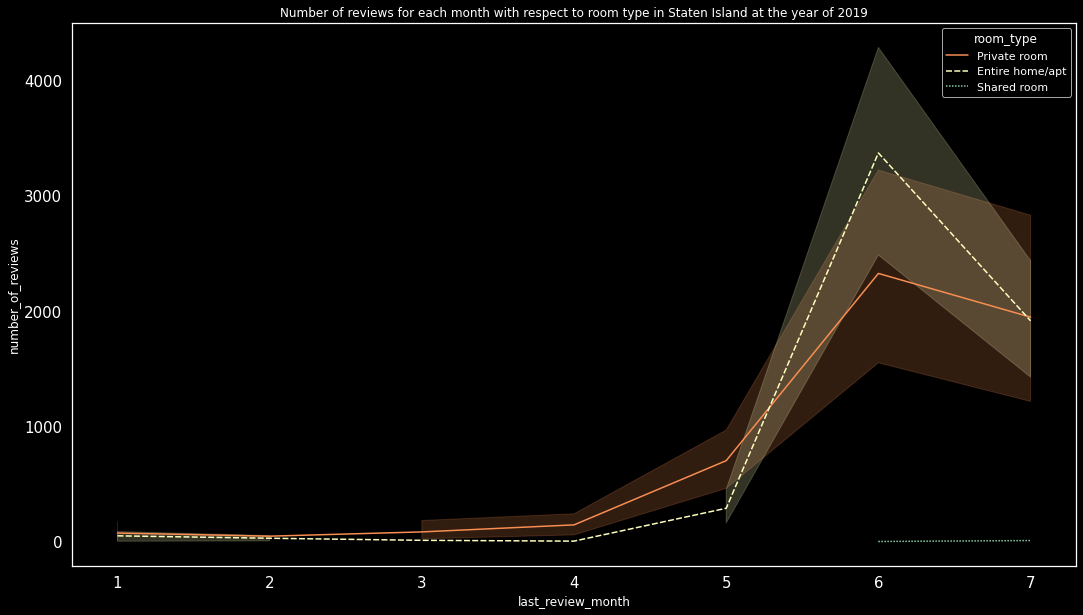

In [38]:
#Filtering out necessary columns required for analysis
df_staten_date=df_staten[['number_of_reviews','room_type','last_review_month','last_review_year']]
df_staten_date_2019=df_staten_date.loc[df_staten_date['last_review_year']==2019]
#setting figure size and font size
plt.figure(figsize=(18,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Number of reviews for each month with respect to room type in Staten Island at the year of 2019')
ax = plt.axes()
ax.set_facecolor("black")
#plotting line plot
sns.lineplot(x=df_staten_date_2019['last_review_month'],y=df_staten_date_2019['number_of_reviews'],hue=df_staten_date_2019['room_type'],
             style=df_staten_date_2019['room_type'],estimator=np.sum,palette='Spectral')

<u>From above plot</u>


1.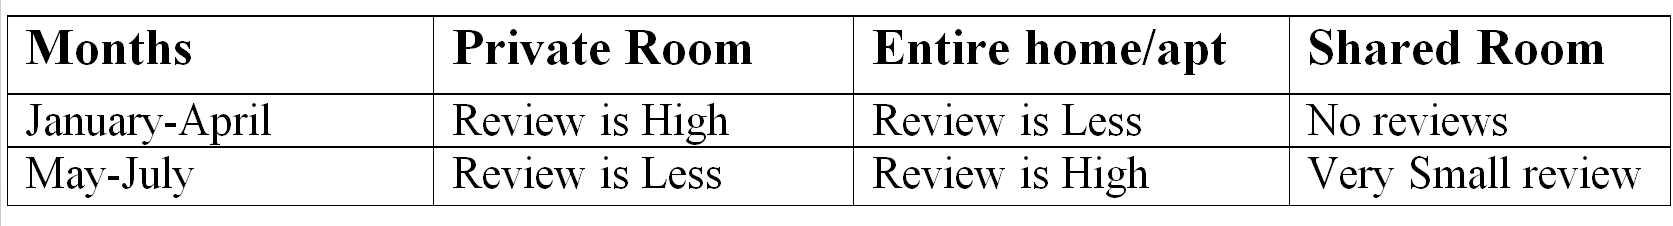

2. We can also say that at the months between **May and July** is a **Season time** in **Staten Island** at the year of __2019__.
3. The __Entire home/apt__ Roomtype has __more number of reviews__ from customers in __Staten Island__ in the year of __2019__.


###<font color=blue>__6.I'm really excited and satifsied that room provided in Staten Island which was really clean and awesome.I like to know the host name to thank and give positive feedback.__</font>

In [43]:
#Extracting Roomtype of Entire hom/apt from Staten Island Data
df_host=df_staten.loc[df_staten['room_type']=='Entire home/apt']
#Filtering out necessary columns required for analysis
df_host_new=df_host[['name','host_id','host_name','price','minimum_nights']]
#Creating new column of 10 day price
df_host_new['total_10_day_price']=df_host_new['price']*10

In [44]:
#plotting bar graph and styling with pattern shape
fig = px.bar(x='host_name',y='total_10_day_price',data_frame=df_host_new.sort_values('total_10_day_price',ascending=False).head(10),
             text='total_10_day_price',color='name',opacity=.8,pattern_shape="name", 
             pattern_shape_sequence=['x', '/', '\\', 'x', '-', '|', '+', '.'],
             color_discrete_sequence=px.colors.qualitative.Prism)
#Updating traces and layout to beautify the plot and setting the font size
fig.update_traces(textfont=dict(size=15,color='white'),textposition='outside')
fig.update_layout(title='10 days price of Luxury Hotels in Staten Island with their Host Names ',yaxis_title='10 days price',xaxis=dict(titlefont = dict(size=15),
  tickfont = dict(size=14)),yaxis=dict(titlefont = dict(size=15),tickfont = dict(size=14),
        showgrid=True,gridcolor='rgb(26, 173, 102)',
        showticklabels=True),autosize=False,
    width=1500,
    height=600,plot_bgcolor='black')
#show figure
fig.show()

<u>From above plot</u>
1. __Alissa__ host has __most expensive__ room type of __Entire home/apt__ with price of __50000__ for __10 days__.
2. The __Customer budget__ is only __below 15000__.So Customer __decided to choose Anastasios__ host room. Which the customer budget is matching with Anastasios budget of 10days price.

In [45]:
#printing the host_name and Rental place of Vidhyut Stayed in 10 days at Staten Island to thank the Host
index=[]
for i,j in df_host_new.iterrows():
    if j['price']*10>10000 and j['price']*10<=15000:
        index.append(i)
        index.append(j['name'])
        index.append(j['host_name'])
        index.append(j['price'])

print(f"The Vidhyut stayed at {index[1]} is a name of Rental Place and price of that room is {index[-1]*10} for 10 days.The host_name is {index[-2]}")

The Vidhyut stayed at Central Hall Colonial with Free Parking Bus EXP NY is a name of Rental Place and price of that room is 12500 for 10 days.The host_name is Anastasios


###__Transformation of Important Numeric columns in to Normal Distribution using Central Limit Theorem__

In [39]:
#Numerical columns need to be transformed
num_col=['price','number_of_reviews','calculated_host_listings_count','minimum_nights']

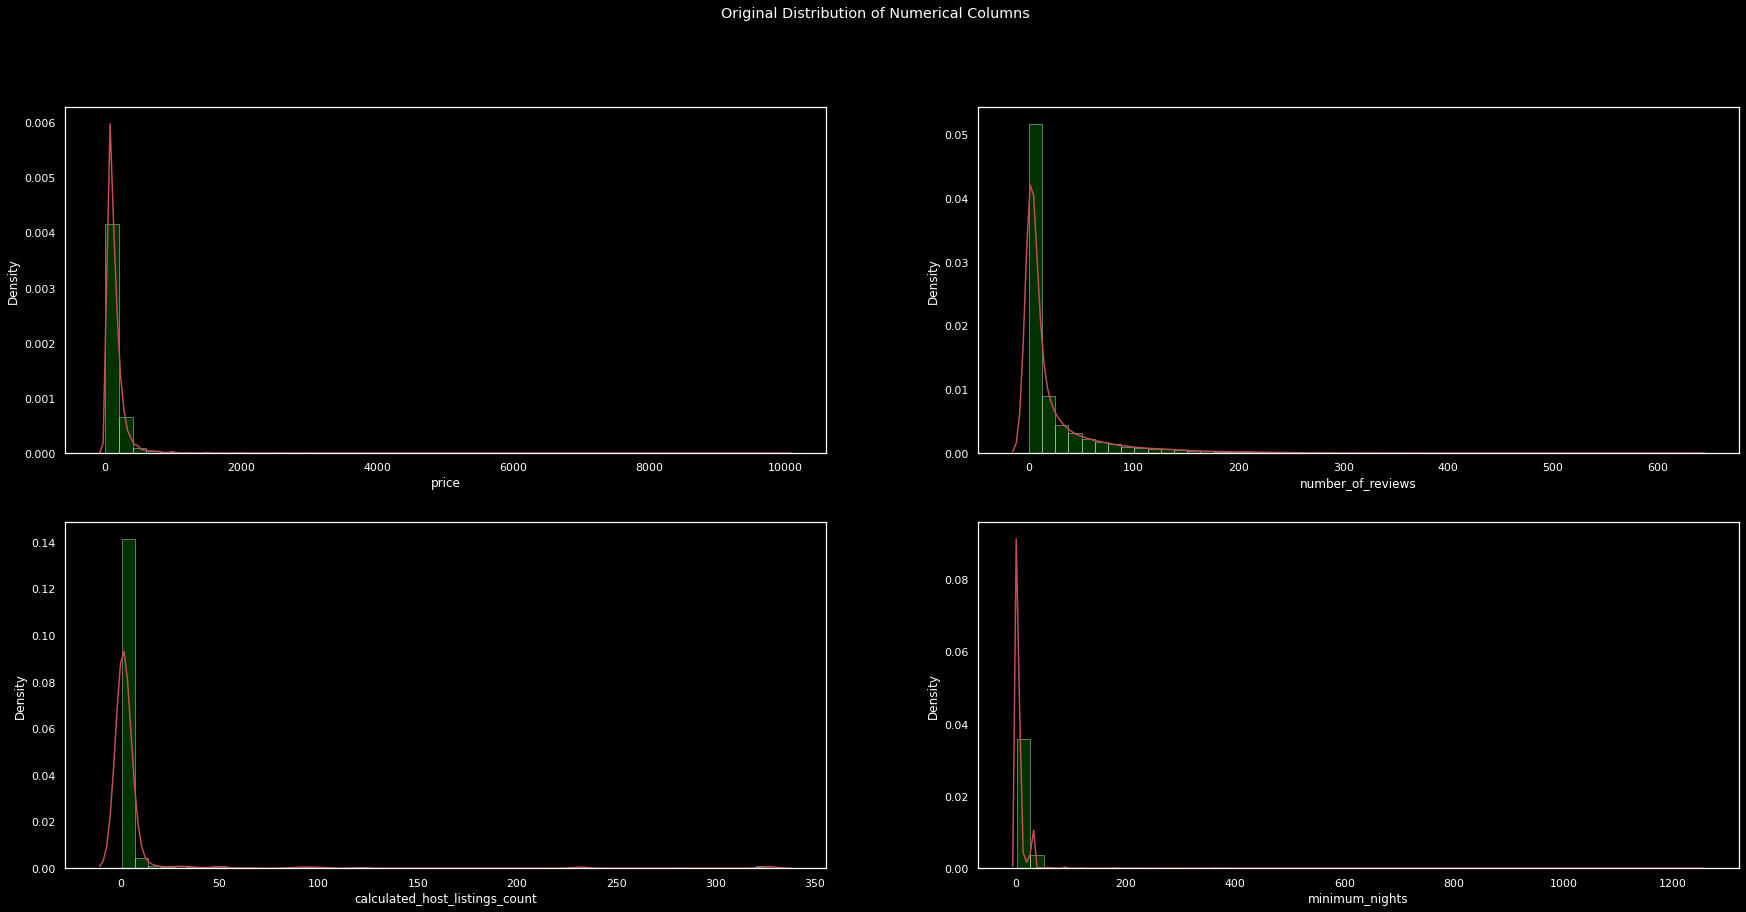

In [40]:
#setting subplots
fig, ax =plt.subplots(2,2,figsize=(30,14))
fig.suptitle('Original Distribution of Numerical Columns')
axis=0
j=0
for i in range(4):
  if i<2:
    sns.distplot(df_air_clean[num_col[i]],kde=True,color='green',kde_kws={'color':'r'},ax=ax[axis][i])
  elif i>=2:
    axis=1
    sns.distplot(df_air_clean[num_col[i]],kde=True,color='green',kde_kws={'color':'r'},ax=ax[axis][j])
    j=j+1
#show figure
fig.show()

__Important Numeric Column after Applying Central Limit Theorem__

In [41]:
#Applying central limit by defining sample size and number of samples
means = []
sample_size=70
number_of_samples=1500
np.random.seed(1)
#calculating mean of each smaples drawn
for column in num_col:
  x = [np.mean(np.random.choice(df_air_clean[column],sample_size)) for _i in range(number_of_samples)]
  means.append(x)

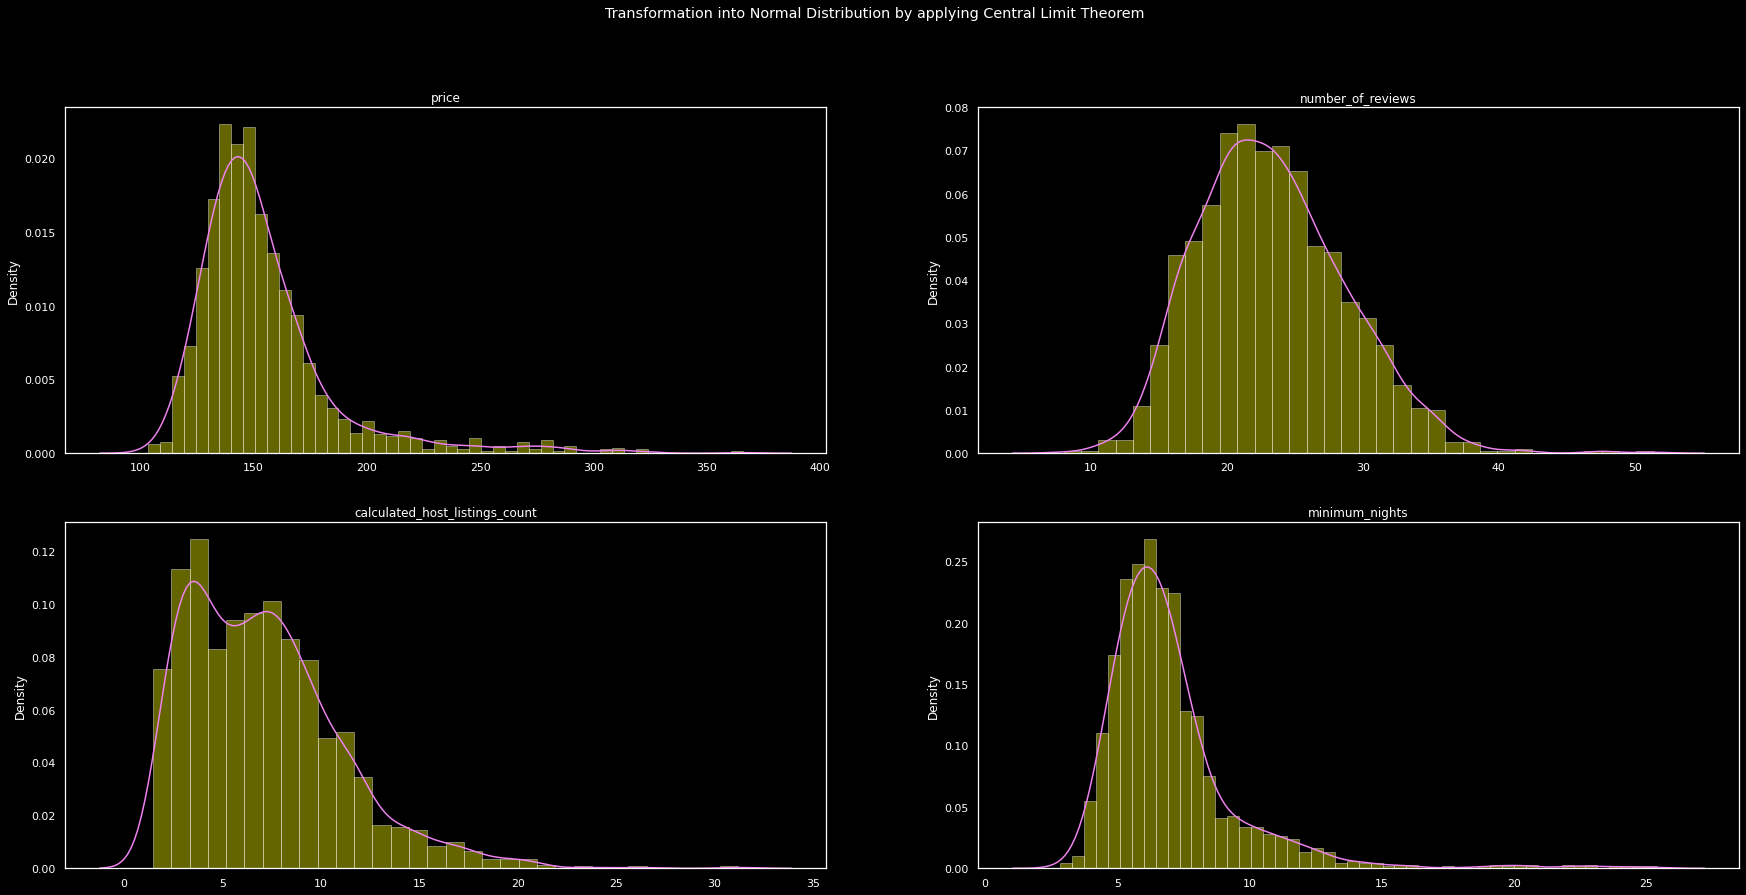

In [42]:
#setting subplots
fig, ax =plt.subplots(2,2,figsize=(30,14))
fig.suptitle('Transformation into Normal Distribution by applying Central Limit Theorem')
axis=0
j=0
for i in range(4):
  if i<2:
    sns.distplot(means[i],kde=True,color='yellow',kde_kws={'color':'violet'},ax=ax[axis][i]).set(title=num_col[i])
  elif i>=2:
    axis=1
    sns.distplot(means[i],kde=True,color='yellow',kde_kws={'color':'violet'},ax=ax[axis][j]).set(title=num_col[i])
    j=j+1
#show figure
fig.show()